In [1]:
import skimage.io
import skimage.transform
from skimage.filters import threshold_otsu
import numpy as np

import matplotlib.pyplot as plt

In [2]:
def rotate180(arr):
    arr180 = skimage.transform.rotate(arr, 180, preserve_range=True)
    return arr180

In [3]:
def screenBlend(arr1, arr2):
    blend = 1 - (1-arr1)*(1-arr2)
    return blend

In [4]:
#Normalize the display range of the images. 
#Sets the min and max to be a percentile of foreground or background pixels
def normalizeRange(arr, **kwargs):
    thresh = threshold_otsu(arr)
    pxforeground = arr[arr>thresh]
    
    maxperc = kwargs.get("max")
    minperc = kwargs.get("min")
    
    maxpx = np.percentile(pxforeground, maxperc)
    minpx = np.percentile(arr, minperc)
    
    if kwargs.get("minmaxpx"):
        imgnorm = (arr-minpx) / (maxpx - minpx)
    else:
        imgnorm = arr / maxpx
        
    imgnorm[imgnorm>=1]=1
    
    return imgnorm

#### Set the color sets we will use

In [5]:
#Color dictionary of channels that will be multiplied by the img
#Ex: green should have the "R" and "B" channel set to 0 so channels 0, and 2 should be 0.
#add more color schemes here if you want more options
COLOR_DICT={"gray"       :[1,1,1],
            "green"      :[0,1,0],
            "cyan"       :[0,1,1],
            "magenta"    :[1,0,1],
            "red"        :[1,0,0],
            "yellow"     :[1,1,0],
            "blue"       :[0,0,1],
            "dark orange":[1,0.55,0],
            "violet"     :[0.56, 0, 1],
            "violet gray":[1,0.8,1]}

In [6]:
def setColor(img, **kwargs):
    ch = COLOR_DICT.get(
        kwargs.get("color")
    )
    
    newimg = img*ch
    return newimg

#### Psuedo color the image to match the barcode colors

In [7]:
#Load the Cropped three channel image, Note: Image is 1400x1400x3 dimensions
img = skimage.io.imread("NJS117-Ptriangle-crop.tif")

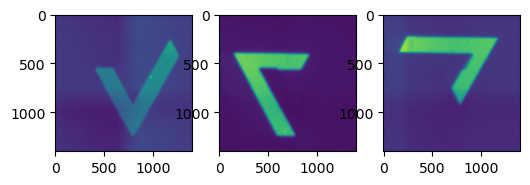

In [8]:
#check out the image
fig, axs = plt.subplots(1,3)
fig.dpi=100
axs[0].imshow(img[:,:,0])
axs[1].imshow(img[:,:,1])
axs[2].imshow(img[:,:,2])

In [9]:
### Normalize all images and convert to color###
imgcolor = []
for i in range(3):
    imgnorm = normalizeRange(img[:,:,i], min=1, max=95, minmaxpx=True)
    imgcolor.append(skimage.color.gray2rgb(imgnorm))

In [10]:
imgcolor[0] = setColor(imgcolor[0], color='magenta')
imgcolor[1] = setColor(imgcolor[1], color='green')
imgcolor[2] = setColor(imgcolor[2], color='cyan')

In [11]:
#Blend three channels
blend = screenBlend(imgcolor[0],imgcolor[1])
blend = screenBlend(blend, imgcolor[2])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


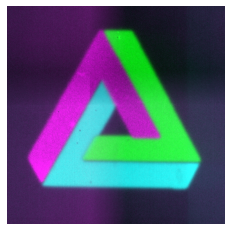

In [12]:
blend = rotate180(blend) #Rotate to match camera

#Current DPI set to 300, change it depending on your preferences.
plt.imshow(blend, vmax=1)
plt.axis("off")
plt.savefig('NJS117-penrosetriangle.png', dpi=300, bbox_inches='tight', transparent='True', pad_inches=0)

In [13]:
#Note: Pixel scaling is 0.3278 microns / pixel, this image was scanned with the 40x objective on the imgexpress